In [223]:
from requests import get
from bs4 import BeautifulSoup
import os
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import smtplib
import urllib.request
from PIL import Image
import sys
sys.getdefaultencoding()
import json

In [213]:
url_base = 'https://www.worldometers.info/coronavirus/'
urls = [url_base+'country/spain/',url_base+'country/italy/',url_base]
countries = ['España:','Italia:', 'todo el Mundo:']
scrapped_info = ['Infectados','Fallecidos','Recuperados']
result=""
for url in urls:
    result+="Afectados en "+countries[urls.index(url)]+os.linesep
    html_soup = BeautifulSoup(get(url).text, 'html.parser')
    virus_containers = html_soup.find_all('div', class_ = 'maincounter-number')
    for number in virus_containers:
        result+=scrapped_info[virus_containers.index(number)]+": "+number.find('span').get_text()+os.linesep
    result+=os.linesep
result+=os.linesep

Afectados en España:
Infectados: 39,676        
Fallecidos: 2,800
Recuperados: 3,794

Afectados en Italia:
Infectados: 63,927        
Fallecidos: 6,077
Recuperados: 7,432

Afectados en todo el Mundo:
Infectados: 401,804        
Fallecidos: 17,498
Recuperados: 103,756





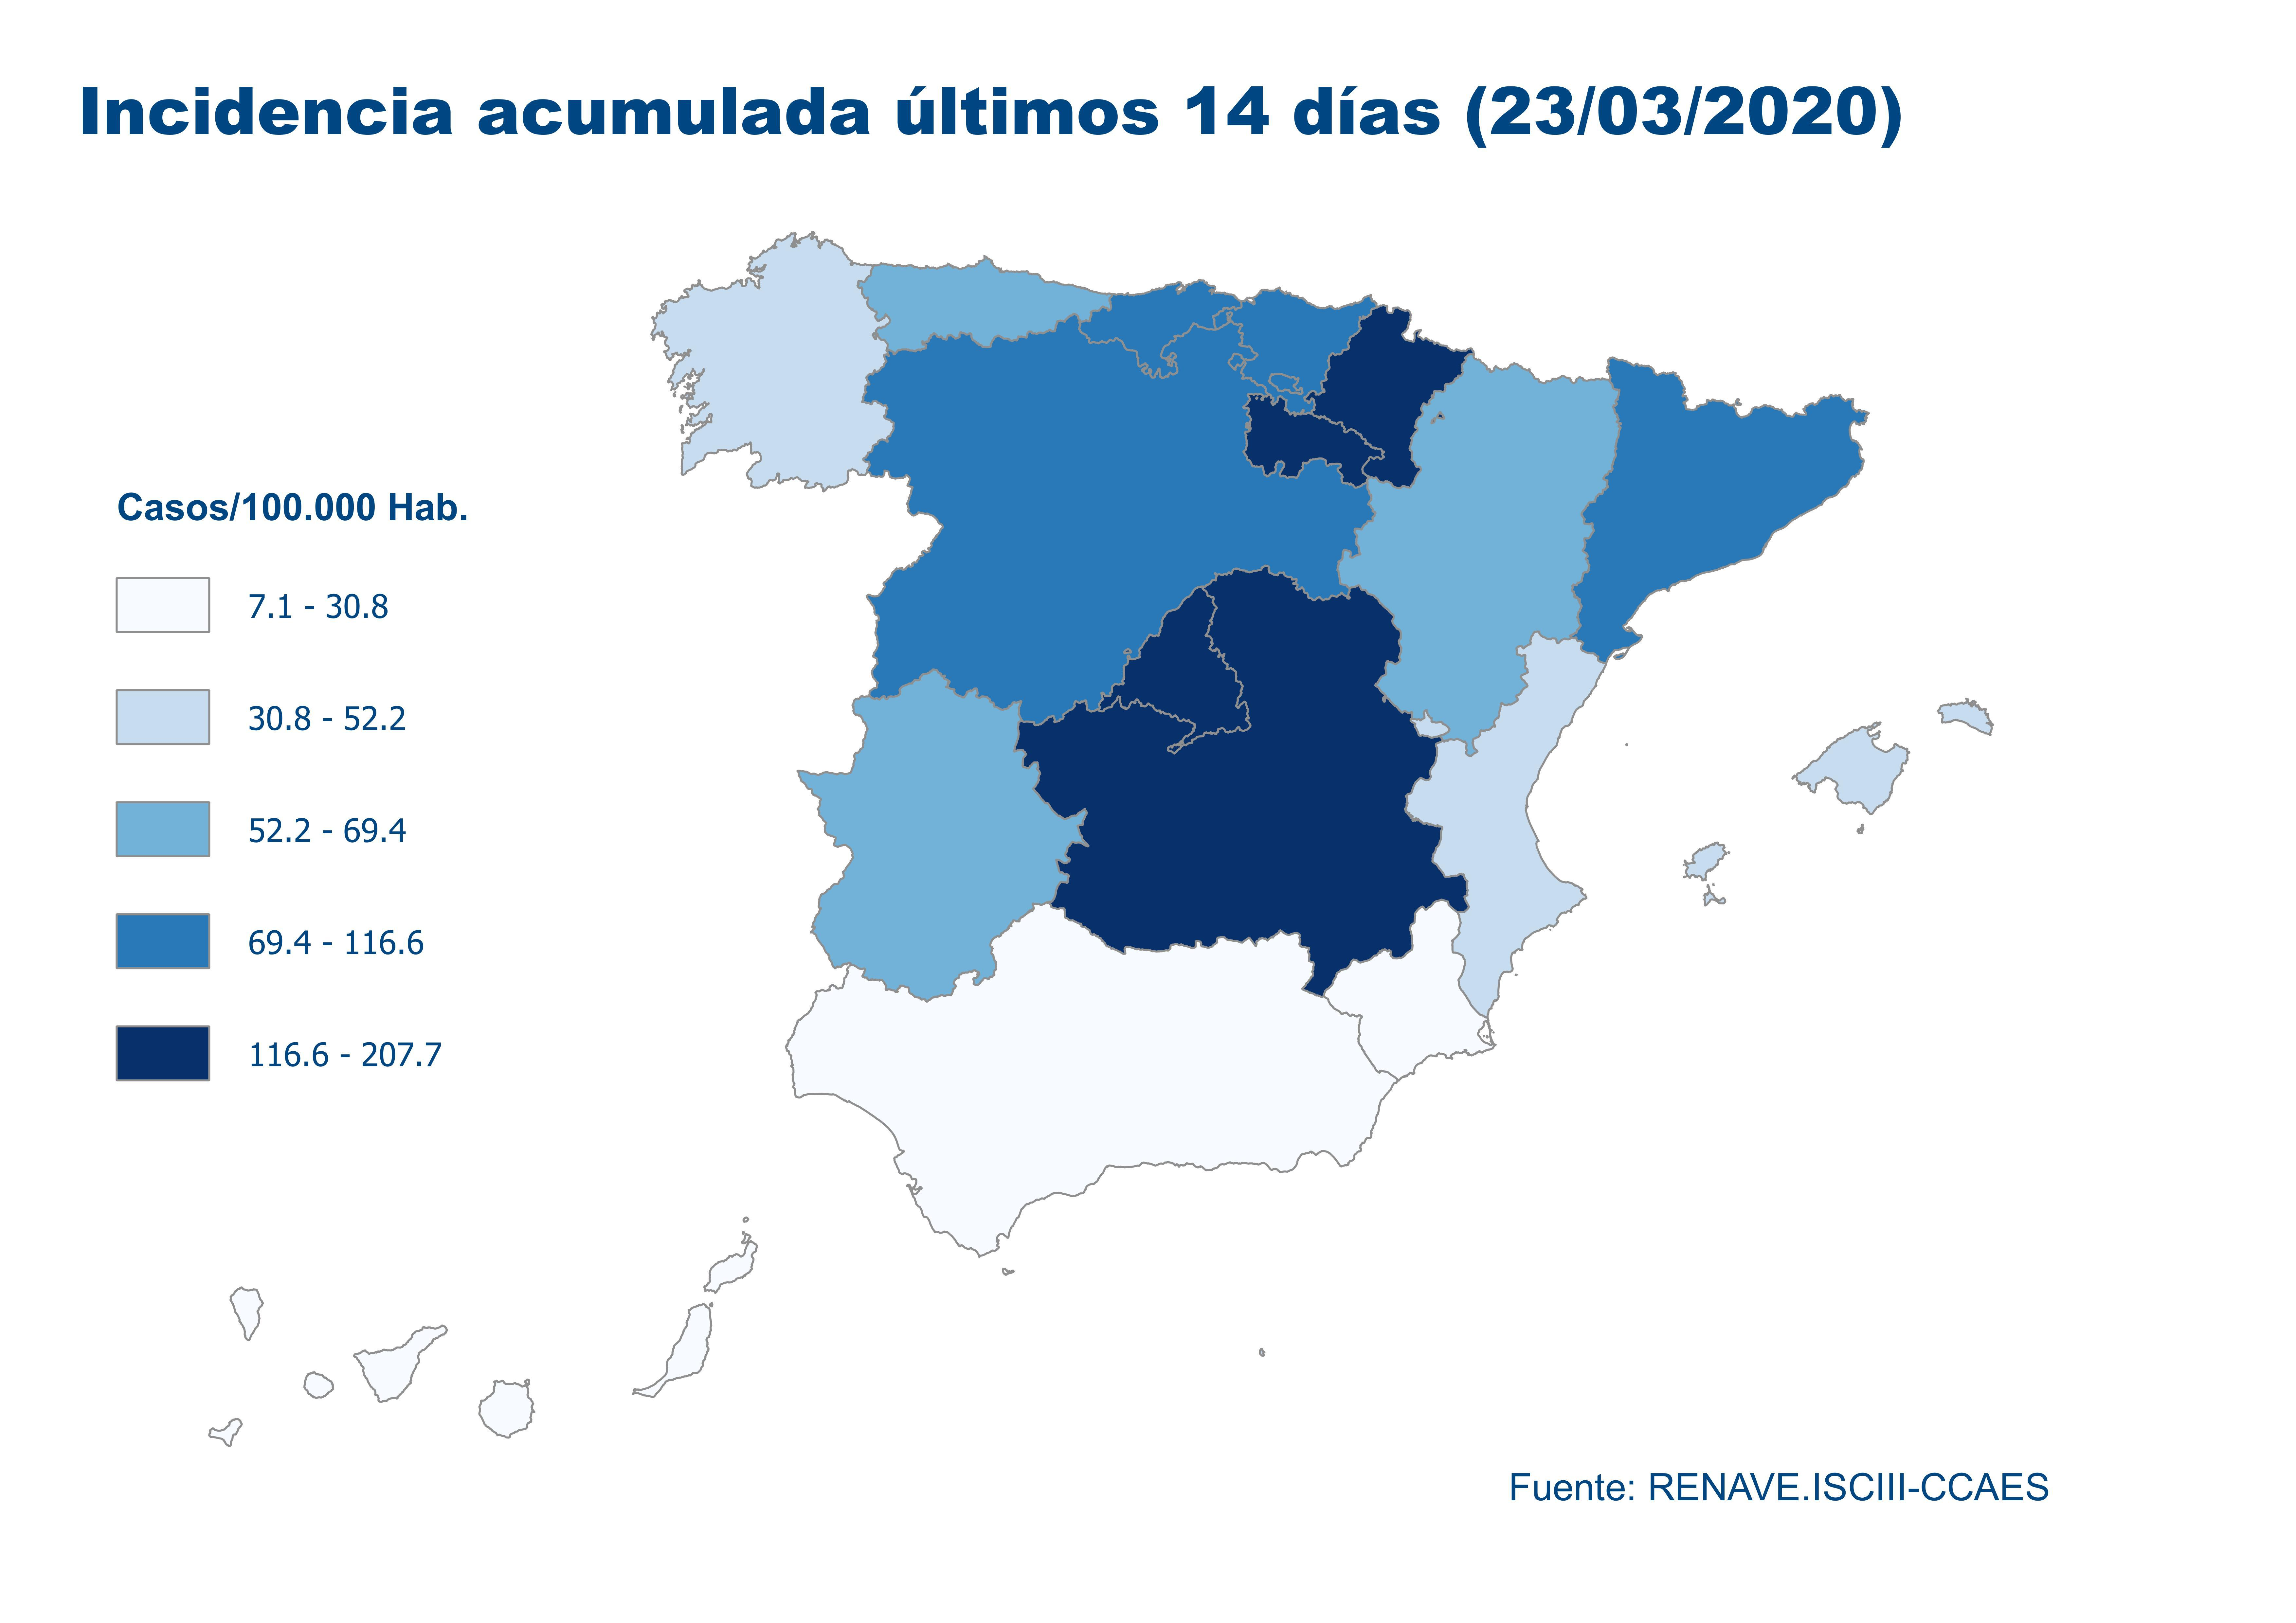

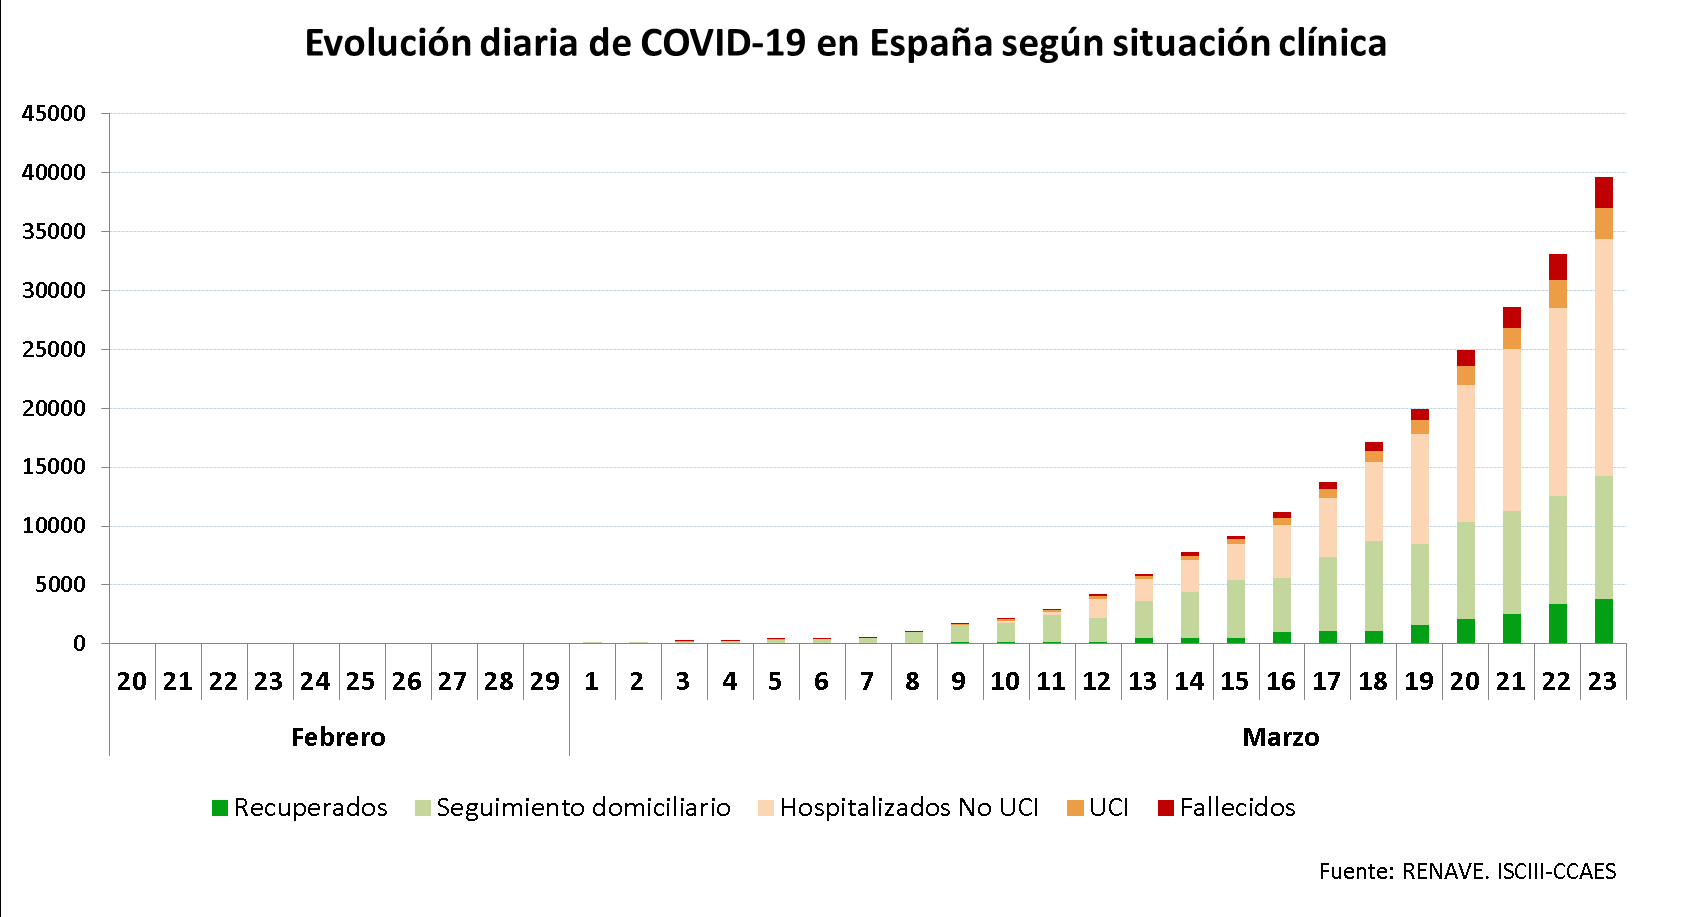

In [80]:
def extractMapImage():
    return Image.open(urllib.request.urlopen("https://covid19.isciii.es/resources/Mapa.jpg"))
def extractCurveStatusImage():
    return Image.open(urllib.request.urlopen('https://covid19.isciii.es/resources/CURVASTATUS.png')).convert('RGB')
extractMap()
extractCurveStatusImage()

In [228]:
def getRegion(region):
    now = datetime.datetime.now()
    date_str = str(now.year).zfill(2)+'-'+str(now.month).zfill(2)+'-'+str(now.day-1).zfill(2)
    api_url_base = 'https://api.covid19tracking.narrativa.com/api/'+date_str+'/country/spain/region/'+region
    headers = {'Content-Type': 'application/json','Authorization': 'Bearer {0}'}
    if requests.get(api_url_base, headers=headers).status_code == 200:
        json_region = json.loads(response.content.decode('utf-8'))['dates'][str(now.year).zfill(2)+'-'+str(now.month).zfill(2)+'-'+str(now.day-1).zfill(2)]['countries']['Spain']['regions'][0]
        return ['Infectados: '+str(json_region['today_confirmed']),
        'Fallecidos: '+str(json_region['today_deaths']),
        'Recuperados: '+str(json_region['today_recovered'])]
    else:
        return None

def getRegions():
    final_result=''
    regions = ['Andalucía','Galicia','Madrid','Cataluña']
    for region in regions:
        results=getRegion(region)
        if results != None:
            final_result+='Afectados en '+region+": "+os.linesep+results[0]+os.linesep+results[1]+os.linesep+results[2]+os.linesep
            final_result+=os.linesep
    return final_result

In [3]:
def getDateTime():
    SEP = "/"
    now = datetime.datetime.now()
    return str(now.day).zfill(2)+SEP+str(now.month).zfill(2)+SEP+str(now.year).zfill(2)+" "+str(now.hour).zfill(2)+":"+str(now.minute).zfill(2)

In [ ]:
msg = MIMEMultipart()

# setup your Gmail Parameters
password = "***"
msg['From'] = "***"
msg['To'] = "***"
msg['Subject'] = "Coronavirus, "+ getDateTime()
 
# add in the message body
msg.attach(MIMEText(result, 'plain'))
msg.attach(MIMEText(getRegions(), 'plain'))
#Gmail Server
server = smtplib.SMTP('smtp.gmail.com: 587')
 
server.starttls()
 
# Login Credentials for sending the mail
server.login(msg['From'], password)
 
 
# send the message via the server.
server.sendmail(msg['From'], msg['To'], msg.as_string())
 
server.quit()
 
print("successfully sent email to: "+msg['To'])